# Mini Project 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data [ x Marks] 

In [4]:
# scaling 
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
print(data.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

/home/teddy/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## 4. Finding groups

### Approach 1

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

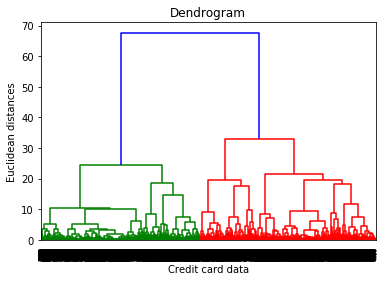

In [5]:
# dendrograms 
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Credit card data')
plt.ylabel('Euclidean distances')
plt.show()

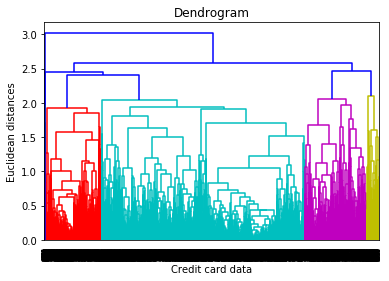

In [6]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Credit card data')
plt.ylabel('Euclidean distances')
plt.show()

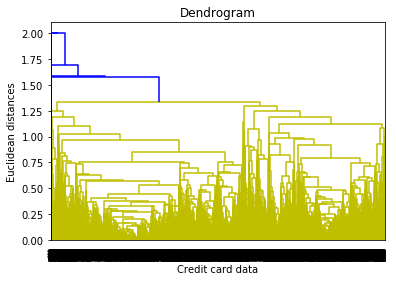

In [7]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Credit card data')
plt.ylabel('Euclidean distances')
plt.show()

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [30]:
# clustering (hint: Use AgglomerativeClustering imported above)
# 1) ward - euclidean 
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
hc_labels = y_hc.labels_
clusters_1=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_1.groupby('cluster').mean()


Silhouette score is: 0.35675930998366606


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.070976,0.92694,0.034167,0.022962,0.032892,0.011886,0.835361,0.322494,0.660262,0.052779,0.015932,0.073201,0.156960,0.037943,0.011091,0.231945,0.929456
1,0.094433,0.82271,0.005397,0.005277,0.002208,0.030522,0.111365,0.070601,0.039481,0.131088,0.037926,0.005815,0.138984,0.030025,0.011579,0.067780,0.908675


In [18]:
# 2) complete - euclidean 
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_2=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_2.groupby('cluster').mean()

Silhouette score is: 0.22146356480153623


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.092953,0.860079,0.014503,0.009618,0.014199,0.024209,0.378454,0.136068,0.297906,0.104340,0.030829,0.031674,0.143106,0.031796,0.012957,0.056686,0.937203
1,0.039111,0.944533,0.038683,0.028947,0.031889,0.006609,0.888655,0.470962,0.589165,0.029616,0.008498,0.076437,0.176611,0.040989,0.005023,0.530735,0.976564
2,0.041962,0.892862,0.015579,0.009319,0.017076,0.016232,0.823566,0.196130,0.611225,0.094890,0.020144,0.032657,0.079559,0.012098,0.005305,0.288033,0.221868
3,0.392988,0.989562,0.491768,0.456733,0.244405,0.019818,0.974691,0.887654,0.825926,0.057613,0.025896,0.393027,0.559760,0.456179,0.045356,0.438973,0.987654
4,0.572650,1.000000,0.008808,0.003275,0.013264,1.000000,0.583333,0.250000,0.500000,0.666667,1.000000,0.058659,0.652755,0.769863,0.070598,0.000000,1.000000


In [19]:
# 3) complete - manhattan
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage ='complete')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_3=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_3.groupby('cluster').mean()

Silhouette score is: 0.25366673242672355


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.385613,0.997855,0.239990,0.199276,0.162056,0.063130,0.988492,0.825298,0.911185,0.163943,0.073353,0.310840,0.453753,0.259484,0.044069,0.216505,0.992509
1,0.093446,0.830238,0.005576,0.004445,0.004107,0.029972,0.159206,0.060966,0.098145,0.130725,0.038074,0.008179,0.138002,0.029477,0.012015,0.061341,0.908552
2,0.237970,0.709091,0.283484,0.338267,0.005055,0.342399,0.400000,0.316667,0.116667,0.277778,0.289431,0.058659,0.539900,0.754354,0.066930,0.360000,1.000000
3,0.097403,0.978809,0.044599,0.035465,0.032975,0.015558,0.822507,0.561960,0.510760,0.066824,0.020051,0.091974,0.197634,0.047711,0.012861,0.241038,0.982656
4,0.025327,0.867118,0.017322,0.005360,0.028064,0.002739,0.858907,0.098514,0.789580,0.018939,0.003972,0.047929,0.102798,0.018051,0.006429,0.265280,0.870970


In [20]:
# 4) complete - cosine 
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage ='complete')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_4=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_4.groupby('cluster').mean()

Silhouette score is: 0.1984177351031594


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.086034,0.834319,0.030755,0.025416,0.021005,0.014172,0.571193,0.344676,0.364387,0.059572,0.018005,0.056092,0.165893,0.039022,0.010893,0.059411,0.972985
1,0.113661,0.935304,0.002512,0.002822,0.000364,0.039022,0.046358,0.038992,0.007581,0.170716,0.049901,0.002320,0.134724,0.030421,0.013215,0.023813,0.898933
2,0.020492,0.914147,0.035013,0.023635,0.033523,0.006526,0.855008,0.359751,0.638094,0.035172,0.008460,0.069366,0.157337,0.034448,0.003379,0.698032,0.780919
3,0.004608,0.457401,0.009851,0.007679,0.007559,0.010587,0.281166,0.104930,0.163305,0.040185,0.012426,0.014387,0.148554,0.037705,0.001930,0.779005,0.922087
4,0.071846,0.908591,0.022148,0.005463,0.038394,0.012614,0.957656,0.075018,0.926592,0.051821,0.015582,0.066398,0.125615,0.028983,0.016827,0.093155,0.944858


In [21]:
# 5) average - euclidean
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_5=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_5.groupby('cluster').mean()

Silhouette score is: 0.26827216220915173


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.081681,0.877124,0.019707,0.013836,0.017900,0.020649,0.489588,0.201471,0.364177,0.089969,0.026287,0.040490,0.147706,0.033420,0.011136,0.152936,0.919913
1,0.178078,0.876191,0.012047,0.014493,0.000000,0.060855,0.747619,0.747619,0.000000,0.384127,0.108943,0.022905,0.242871,0.064433,0.013283,0.620000,0.133333
2,0.572650,1.000000,0.008808,0.003275,0.013264,1.000000,0.583333,0.250000,0.500000,0.666667,1.000000,0.058659,0.652755,0.769863,0.070598,0.000000,1.000000
3,0.592433,1.000000,0.255128,0.019381,0.520949,0.024204,1.000000,0.166667,1.000000,0.018518,0.005420,0.641527,0.372287,0.197776,0.429040,0.000000,1.000000
4,0.273841,0.968687,0.692721,0.707517,0.228064,0.005492,0.924074,0.885185,0.598148,0.012346,0.004517,0.443513,0.647561,0.624758,0.050333,0.736111,0.962963


In [22]:
# 6) average - manhattan
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage ='average')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_6=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_6.groupby('cluster').mean()

Silhouette score is: 0.22810589719263652


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.080033,0.876360,0.018169,0.012542,0.016891,0.019978,0.486425,0.197392,0.361209,0.089189,0.025792,0.038638,0.145636,0.031293,0.011048,0.152706,0.918894
1,0.301087,0.984416,0.243900,0.197866,0.173133,0.094687,0.935183,0.763754,0.739650,0.186462,0.083201,0.313611,0.427921,0.306135,0.036472,0.264505,0.989177
2,0.572650,1.000000,0.008808,0.003275,0.013264,1.000000,0.583333,0.250000,0.500000,0.666667,1.000000,0.058659,0.652755,0.769863,0.070598,0.000000,1.000000
3,0.657108,1.000000,0.918544,0.998317,0.193437,0.005921,0.916667,0.833333,0.666667,0.027778,0.004065,0.360335,0.657763,0.818168,0.123606,0.166666,1.000000
4,0.185912,0.696970,0.454269,0.544317,0.004004,0.137991,0.361111,0.333333,0.027778,0.148148,0.094851,0.070764,0.616027,0.790017,0.086242,0.333333,1.000000


In [23]:
# 7) average - euclidean
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage ='average')
y_hc=hc.fit(data)
print("Silhouette score is: "+ str(metrics.silhouette_score(data, y_hc.labels_)))
clusters_7=pd.concat([data, pd.DataFrame({'cluster':y_hc.labels_})], axis=1)
clusters_7.groupby('cluster').mean()

Silhouette score is: 0.1485770603902664


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,0.082225,0.879477,0.020669,0.014515,0.018767,0.020062,0.497205,0.201149,0.373818,0.086425,0.025837,0.041866,0.149366,0.034483,0.011482,0.156524,0.945927
1,0.083015,0.829933,0.011881,0.012241,0.003719,0.041742,0.293866,0.245356,0.091296,0.202091,0.043773,0.018420,0.120088,0.018409,0.006592,0.041576,0.128019
2,0.000011,0.090909,0.015572,0.018734,0.000000,0.001096,0.958333,0.958333,0.000000,0.027778,0.004065,0.032123,0.207012,0.016235,0.001233,0.000000,1.000000
3,0.005354,0.545635,0.000918,0.001104,0.000000,0.018666,0.025794,0.025794,0.000000,0.151124,0.027100,0.000466,0.042571,0.030918,0.000761,0.736111,0.069444
4,0.200623,0.636363,0.408311,0.491236,0.000000,0.206986,0.250000,0.250000,0.000000,0.222222,0.142276,0.060056,0.424040,0.889006,0.051793,0.125000,1.000000


### Approach 2
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [24]:
# clustering 
# 1 
dbscan_model = DBSCAN(eps = 0.1, min_samples = 5).fit(data)
labels = dbscan_model.labels_ 
print(np.unique(labels, return_counts=True))
print("Silhouette score is: "+ str(metrics.silhouette_score(data,labels)))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]), array([5032,   67, 1820, 1282,   15,    9,   59,   56,   14,   13,    7,
         61,   40,   12,    8,   25,    8,    7,   36,   20,    6,    5,
          5,   10,   14,    5,   17,    6,   37,    5,   13,   15,    9,
          5,    8,    7,    7,    5,    8,   15,    5,    5,    5,    6,
         23,   10,    5,    6,    5,    5,    9,    5,    6,    6,   11,
          6,    8,    9,    4,    5,    5,    2,    6]))
Silhouette score is: -0.48013197864601165


In [25]:
# 2
dbscan_model = DBSCAN(eps = 0.5, min_samples = 3).fit(data)
labels = dbscan_model.labels_ 
print(np.unique(labels, return_counts=True))
print("Silhouette score is: "+ str(metrics.silhouette_score(data,labels)))

(array([-1,  0]), array([  45, 8905]))
Silhouette score is: 0.34865793042797255


In [31]:
# 3 
dbscan_model = DBSCAN(eps = 0.8, min_samples = 5).fit(data)
labels = dbscan_model.labels_ 
print(np.unique(labels, return_counts=True))
print("Silhouette score is: "+ str(metrics.silhouette_score(data,labels)))
db_labels=labels

(array([-1,  0]), array([   6, 8944]))
Silhouette score is: 0.4209731724218859


## 5. Visualization 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [27]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
# 1 - hierarchical 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf.head(2)


,P1,P2
0,-0.482164,-0.097656
1,-0.608577,-0.019376


In [32]:
data_principal = principalDf.assign(clusters=hc_labels)
data_principal.head()

,P1,P2,clusters
0,-0.482164,-0.097656,1
1,-0.608577,-0.019376,1
2,0.304508,0.920946,0
3,-0.588621,-0.005612,1
4,-0.554354,0.052965,1


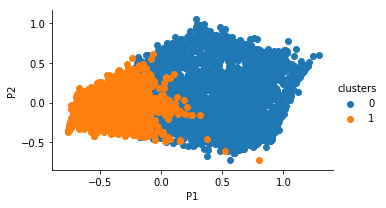

In [33]:
fg = sns.FacetGrid(data=data_principal, hue='clusters', aspect=1.61)
fg.map(plt.scatter, 'P1', 'P2').add_legend()

In [34]:
# 2 - DBSCAN 
data_principal = principalDf.assign(clusters=db_labels)
data_principal.head()

,P1,P2,clusters
0,-0.482164,-0.097656,0
1,-0.608577,-0.019376,0
2,0.304508,0.920946,0
3,-0.588621,-0.005612,0
4,-0.554354,0.052965,0


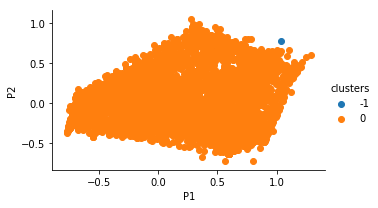

In [35]:
fg = sns.FacetGrid(data=data_principal, hue='clusters', aspect=1.61)
fg.map(plt.scatter, 'P1', 'P2').add_legend()